   #  SYRIATEL DATA ANALYSIS 

Final Project Submission
GROUP 8 Memabers
1. Sydney Mumbo 
3. Chepkemoi Mercy 
4. James Ndiritu 
5. Nicholas Njubi 
6. Brian Kanyotu

# Project Overview

In response to SyriaTel's pressing need to address customer churn, we propose developing a robust classifier to predict customer attrition. Leveraging predictive analytics, our goal is to uncover discernible patterns within SyriaTel's telecommunications data. By employing advanced machine learning techniques, specifically binary classification, we aim to equip SyriaTel with a predictive model capable of identifying customers likely to churn in the near future. Our primary focus is on assisting SyriaTel in minimizing revenue loss by proactively addressing customer retention. Through this project, we aim to unlock actionable insights that will empower SyriaTel to implement targeted strategies to mitigate customer churn, ultimately fostering long-term business sustainability

## Research Questions
1. Which specific features in the SyriaTel dataset are the most significant predictors of customer churn, and how do these features influence the likelihood of churn?

2. How do various predictive models (Logistic Regression, Random Forest, Decision Trees) differ in their accuracy and ability to predict customer churn in the telecommunications sector, and which model provides the best balance between sensitivity (recall) and specificity?

3. To what extent does the preprocessing of the dataset, such as handling of categorical variables, normalization, and addressing class imbalance through techniques like SMOTE, affect the predictive performance of churn models?

# Goals


1. Develop machine learning models capable of forecasting customer churn through the analysis of customer characteristics.
3. Evaluate the constructed machine learning models and ascertain the most precise model for prediction.
4. The objective of the analysis is to pinpoint the particular features that exert a substantial influence on the customer churn rate at SyriaTel. By leveraging these insights, valuable recommendations can be formulated to mitigate churn rates within the company, thus enhancing customer retention

# Data Understanding

In [16]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, make_scorer,accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

# Ignore warnings
warnings.filterwarnings("ignore")


In [50]:

#Reading from a CSV File
df=pd.read_csv("syriatel.csv")

In [32]:
# Dataset preview of the first 5 rows
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
# The shape of the data
df.shape

(3333, 21)

In [20]:
#checking missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [21]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Data Preparation

Below are the areas explored to prepare data for modeling.
   1. Handling missing values
   2. Duplicated rows
   3. Identification and removal of Features that won't impact the analysis.
   

In [22]:
#checking for duplicates 
df.duplicated().sum()

0

In [33]:
# check missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Dropping irrelevant Features.
Columns dropped :
   1. State
   2. Account length
   3. Phone number


Reasons For Dropping
State and Phone number are not applicable in this context since they don't give any information about customer's behaviour.In most cases phone numbers are random or sequential number assigned to new customers.

In [51]:
#dropping irrevant features
irrelevant_features = ['state','phone number']
df.drop(columns = irrelevant_features, inplace =  True )

In [52]:
#New coloumn to calculate total charge for each customer
df['TotalCharge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

# Identification of Multicollinearity

In [53]:
# pairs with collinearity > 0.75
mdf = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
mdf['pairs'] = list(zip(mdf.level_0, mdf.level_1))
mdf.set_index(['pairs'], inplace = True)
mdf.drop(columns=['level_1', 'level_0'], inplace = True)
mdf.columns = ['cc']
mdf.drop_duplicates(inplace=True)
mdf[(mdf.cc>.75) & (mdf.cc<1)]

,cc
pairs,
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993
"(total day charge, TotalCharge)",0.884757
"(TotalCharge, total day minutes)",0.884754


Since multincollinearitycan lead to unstable coefficients, inflated standard errors, and inaccurate predictions.We decided drop one of the correlated variable to mitigate this.
This would improve our models' accuracy.

In [ ]:
#Dropping columns  total night charge','total intl charge','total eve charge','total day charge

In [55]:
MultCfeatures = ['total night charge','total intl charge','total eve charge','total day charge']
df.drop(columns = MultCfeatures, inplace =  True )

In [58]:
#Separating categorical and continuous Features
# Categorical columns
categorical_columns = ['international plan', 'voice mail plan','churn']

# Continuous columns
continuous_columns = ['number vmail messages', 'total day minutes', 'total day calls',
                 'total eve minutes', 'total eve calls',
                 'total night minutes', 'total night calls',
                  'total intl minutes', 'total intl calls',
                  'customer service calls','TotalCharge']

The analysis will have 'churn' as the target/dependant variable.
Churn has two classes :
1. False : Customer has not terminated association with the telco.
2. True  : Customer has  terminated.


# Distribution of Data

In [59]:
#Depandant variable
df.churn.value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

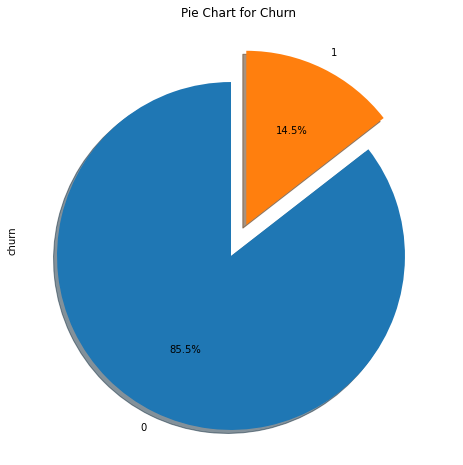

In [61]:
# To get a pie chart to analyze 'Churn' 
df['churn'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

The pie chart shows imbalanced data distribution.
14.5% of customers would actually churn,this can create a biased model.

Correlation Heatmap for Numeric Features

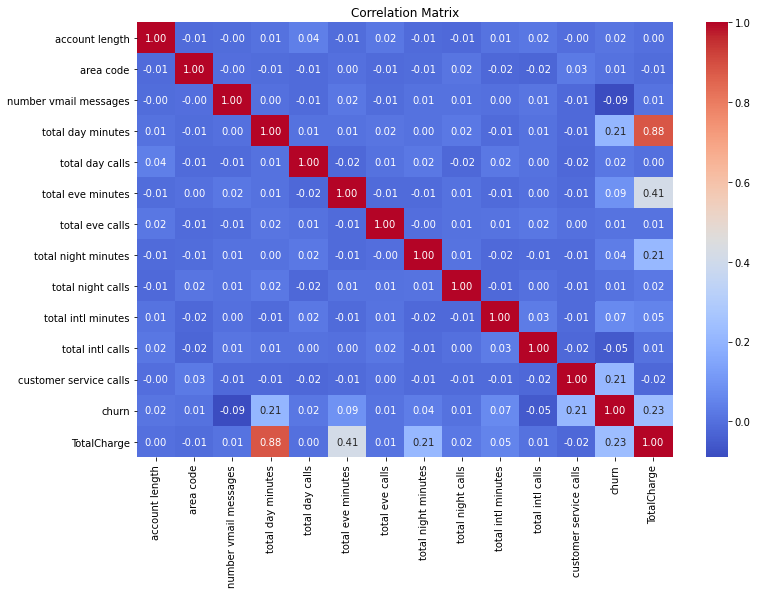

In [60]:

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Most of the characteristics exhibit no correlation, though a few demonstrate a complete positive correlation.
Features with postive Correlation.
total day charge 
total day minutes
total eve charge
total eve minutes
total night charge
total night minutes
total int charge
total int minutes

This perfect correlation is logical as the charge directly corresponds to the minutes used.
A correlation coefficientof 1 signifies perfect multicollinearity, which affects linear models 
differently from nonlinear models.

# Distribution of the data for continuous_columns variable (Histogram)

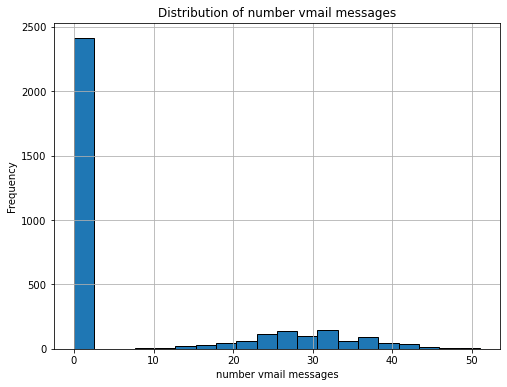

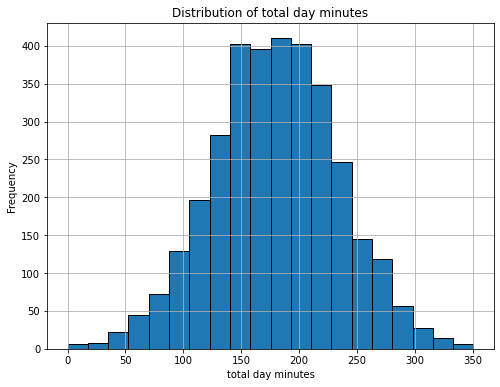

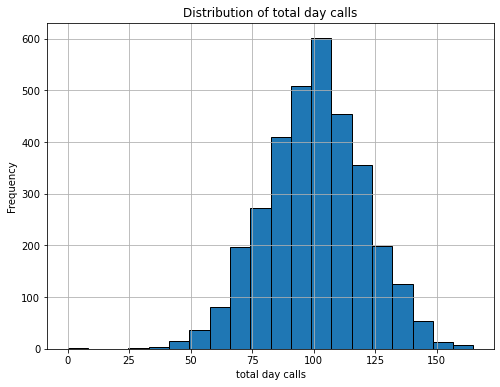

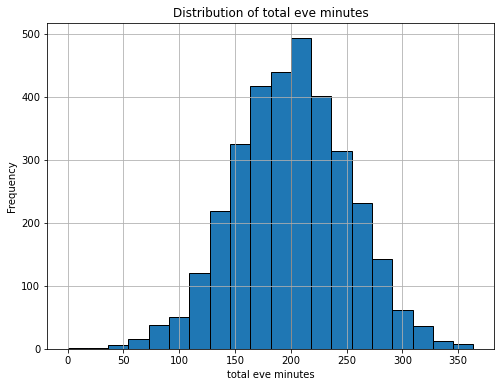

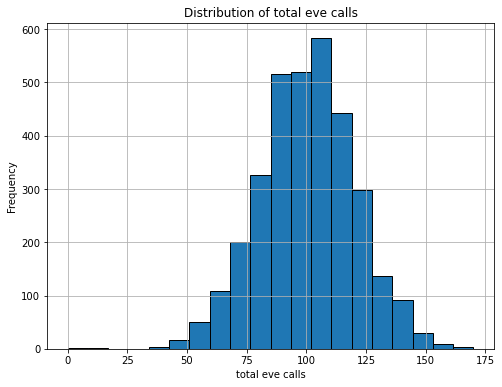

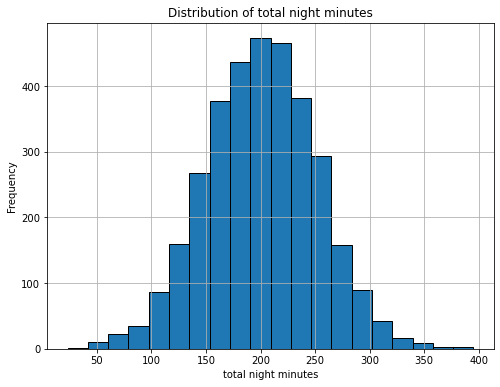

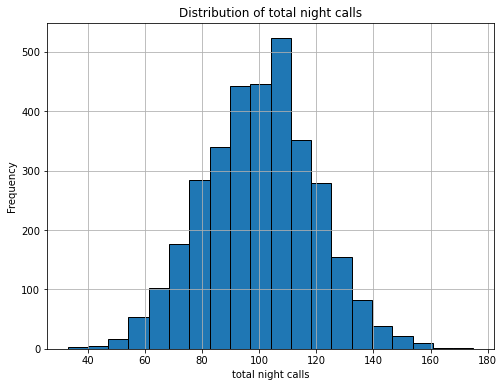

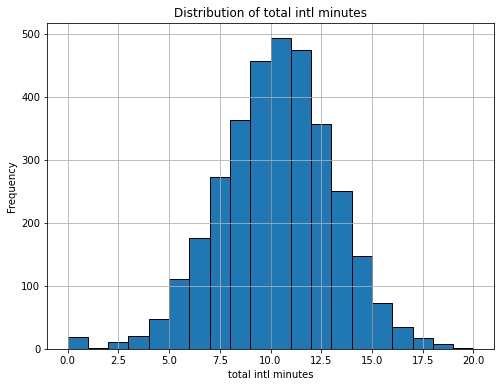

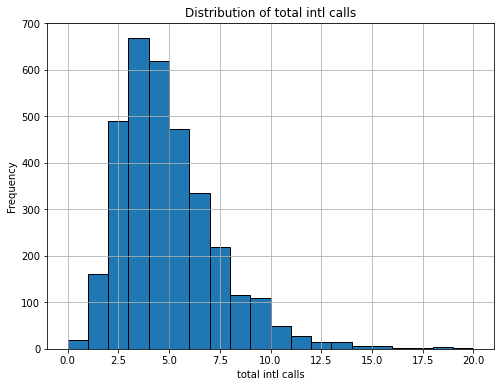

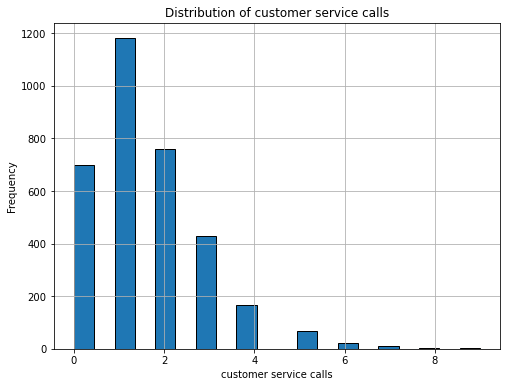

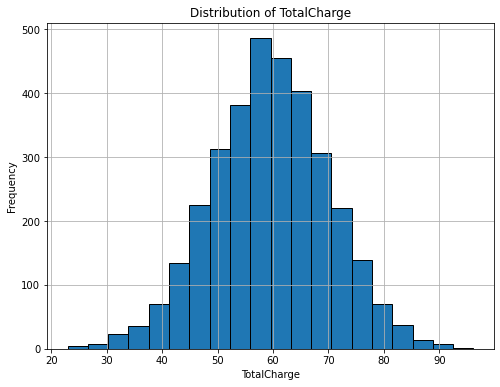

In [61]:
# To check the distribution of the data in the columns in the continuous_columns variable.
continuous_columns = ['number vmail messages', 'total day minutes', 'total day calls',
                 'total eve minutes', 'total eve calls',
                'total night minutes', 'total night calls',
                'total intl minutes', 'total intl calls', 'customer service calls','TotalCharge']
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=20, edgecolor='black')  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Data Pre-processing

# Encoding Categorical Columns

In [62]:
#transformimg categorical data using OHE

# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [63]:
# Tranfrom our dependant variable - 'churn' using LabelEncoder
# Define the function to encode the column
def encode(column):
    Lencod = LabelEncoder()
    df[column] = Lencod.fit_transform(df[column])

# Call the function to encode the 'churn' column
encode('churn')

In [64]:
# Check the value counts for the encoded churn column
print(df['churn'].value_counts())

0    2850
1     483
Name: churn, dtype: int64


# Data Split into Train and Test

In [65]:
# Split the data into (X) and (y)
y = df['churn']
X = df.drop('churn',axis = 1)

#Train-test Split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Logistic Regression Mode Before Data Transformation

In [66]:
#Instantiating regression model
logRegBeforeTansf = LogisticRegression(solver='liblinear', random_state=42)
# Fit the logistic regression model to the training data
logRegBeforeTansf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [67]:
# Make predictions on the test set
y_predBeforeTansf = logRegBeforeTansf.predict(X_test)
# Make predictions on the Train set
y_predBeforeTansfTrain = logRegBeforeTansf.predict(X_train)

# Function for Checking Metrics  

In [68]:
#creating a function for checking for metrics 
def get_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'ROC-AUC For Train Data': roc_auc_train,
        'ROC-AUC For Test Data': roc_auc_test,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

{'ROC-AUC For Train Data': 0.5863415886522221,
 'ROC-AUC For Test Data': 0.5546391211559318,
 'Accuracy Train': 0.8627156789197299,
 'Accuracy Test': 0.8515742128935532,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1c20f475d30>}

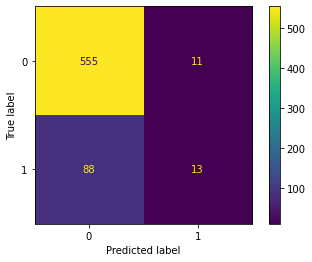

In [69]:
get_model_metrics(logRegBeforeTansf,X_train,y_train,X_test,y_test)


The baseline logistic regression exhibits a discrepancy in discrimination levels between the training and testing datasets. The ROC AUC value on the training data is 0.5863415886522221, while on the testing data, it stands at 0.5546391211559318. This suggests that the model demonstrates a relatively higher level of discrimination between classes on the training data compared to the testing data.

Furthermore, a confusion matrix reveals the predicted and true labels of the logistic regression model. It shows 13 true positives, 88 false negatives, 554 true negatives, and 12 false positives.

In summary, the model attains a training accuracy of around 86% and a testing accuracy of approximately 85%, indicating competent performance in predicting class labels for both datasets. However, it's worth noting that the model's accuracy in prediction, as depicted by the confusion matrix, is not particularly high, suggesting some degree of overfitting.

# Classification Report

In [70]:
# Score on Test data
print(classification_report(y_test, y_predBeforeTansf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.54      0.13      0.21       101

    accuracy                           0.85       667
   macro avg       0.70      0.55      0.56       667
weighted avg       0.81      0.85      0.81       667



In [71]:
# Score on Train data
print(classification_report(y_train, y_predBeforeTansfTrain))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2284
           1       0.56      0.20      0.29       382

    accuracy                           0.86      2666
   macro avg       0.72      0.59      0.61      2666
weighted avg       0.83      0.86      0.83      2666



# Scores before Data Standardization and Removal of Imbalance

# Data Standardization

StandardScaler() will be used to transform features to mean of 0 and standard deviation of 1.
This will help the selected features to equally contribute to the analysis.

In [72]:
#instantiating standard scaler
scaler = StandardScaler()
#Scaler fitting on Train data
scaler.fit (X_train)

#Transform Both Train and Test Data
X_train_Scaled = scaler.transform (X_train)
X_test_Scaled  = scaler.transform (X_test)

# Removal of Imbalance

SMOTE will be used to address underrepresentation of minority class.
It generates sythentic samples to represent minority class more accurately.

In [73]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE on the training data
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [74]:
y_train_resampled.value_counts()

1    2284
0    2284
Name: churn, dtype: int64

# Baseline Logistic Regression Mode After Data Transformation

In [75]:
#Instantiating regression model
logRegres = LogisticRegression(solver='liblinear', random_state=42)
# Fit the logistic regression model to the training data
logRegres.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42, solver='liblinear')

# Predicting with the new Data

In [76]:
#Train data prediction
y_pred_train = logRegres.predict (X_train_resampled)
#Test data predicition
y_pred_test  = logRegres.predict (X_test)

# Scores After  Data Standardization and Removal of Imbalance

# Metrics

{'ROC-AUC For Train Data': 0.7572241681260946,
 'ROC-AUC For Test Data': 0.7421281880838261,
 'Accuracy Train': 0.7572241681260946,
 'Accuracy Test': 0.7556221889055472,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1c20f460a90>}

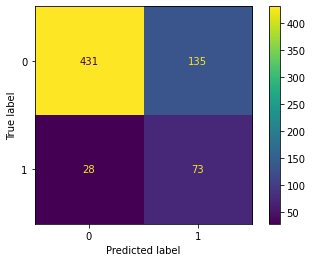

In [77]:
get_model_metrics(logRegres,X_train_resampled,y_train_resampled,X_test,y_test)

Following transformation, the baseline logistic regression has mitigated the gap in discrimination levels between the training and testing datasets. The ROC AUC value is 0.7572241681260946 for the training data and 0.7556221889055472 for the testing data.

The confusion matrix displays the logistic regression model's predicted and true labels, indicating 73 true positives, 28 false negatives, 431 true negatives, and 135 false positives. This represents an enhancement over the previous model.

# Classification Report

In [78]:
#Train Data Accuracy
print(classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2284
           1       0.76      0.76      0.76      2284

    accuracy                           0.76      4568
   macro avg       0.76      0.76      0.76      4568
weighted avg       0.76      0.76      0.76      4568



In [80]:
#Test Data Accuracy
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       566
           1       0.35      0.72      0.47       101

    accuracy                           0.76       667
   macro avg       0.64      0.74      0.66       667
weighted avg       0.85      0.76      0.79       667



##### Precision: It measures the proportion of correctly identified true positives out of all cases that are predicted as positive (true positives + false positives). In this case, for class 1, the precision is 0.35. This means that out of all the instances predicted as class 1, only 35% were actually correct, indicating a only 36% would actually churn.

Recall: It measures the proportion of correctly identified positive cases (true positives) out of all actual positive cases (true positives + false negatives). In this case, for class 1, the recall is 0.72. This means that out of all the actual instances of class 1, 72% were correctly identified by the model, indicating a relatively high recall rate.

F1-score:It provides a single score that balances both precision and recall.In this case, for class 1, the F1-score is 0.47, which indicates that the balance between precision and recall for class 1 is moderate.

Support: The number of actual occurrences of each class in the test dataset. In this case, there are 566 instances of class 0 and 101 instances of class 1.

Accuracy: Overall accuracy of the model, which measures the proportion of correctly classified instances out of the total instances. In this case, the accuracy is 0.76, indicating that the model correctly classified 76% of the instance

# Cross Validation ( Perfomance Improvement)

In [86]:
# Create an instance of Logistic Regression with cross-validation
logreg_cv = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_cv.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred_cv = logreg_cv.predict(X_train_resampled)
y_test_pred_cv = logreg_cv.predict(X_test)


# Scores After Cross Validation

 Metrics

{'ROC-AUC For Train Data': 0.7580998248686515,
 'ROC-AUC For Test Data': 0.7398278697127663,
 'Accuracy Train': 0.7580998248686515,
 'Accuracy Test': 0.7586206896551724,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1c20ee19be0>}

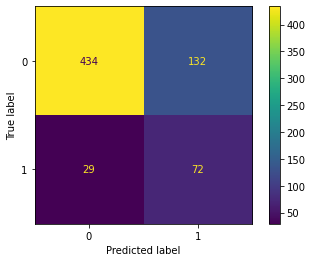

In [82]:
get_model_metrics(logreg_cv,X_train_resampled,y_train_resampled,X_test,y_test)

In this case, the ROC AUC values are 0.7580998248686515 for the training data and 0.7398278697127663 for the testing data. Both values suggest that the model has improved reasonably well in distinguishing between the classes, with slightly higher discrimination observed in the training data compared to the testing data.

Confusion matrix shows 72 true positives, 29 false negatives, 440 true negatives, and 29 false positives.This is an improvement compared to the last model.

In [83]:
print(classification_report(y_test, y_test_pred_cv, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.77      0.84       566
           1       0.35      0.71      0.47       101

    accuracy                           0.76       667
   macro avg       0.65      0.74      0.66       667
weighted avg       0.85      0.76      0.79       667



In [87]:
print(classification_report(y_train_resampled, y_train_pred_cv, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2284
           1       0.76      0.76      0.76      2284

    accuracy                           0.76      4568
   macro avg       0.76      0.76      0.76      4568
weighted avg       0.76      0.76      0.76      4568



# Drawing ROC curve for the Baseline  models 

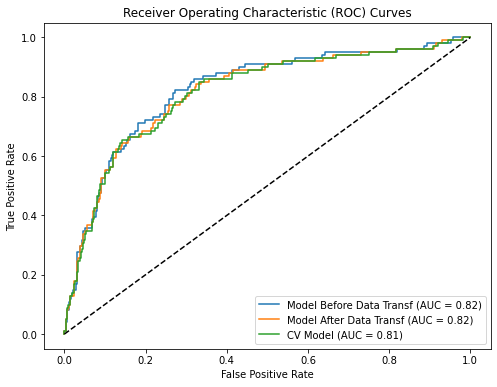

In [88]:


# Compute ROC curves and AUC scores for each model
models = [logRegBeforeTansf, logRegres, logreg_cv]
labels = ['Model Before Data Transf', 'Model After Data Transf', 'CV Model']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

# Conclusion

Although Logistic model after cross validation shows a less ROC_AUC,it performs better with a accuracy of 0.77.
We will use it as our baseline model.
Baseline Model = logreg_cv

# Random Forest Classifier

### Model Creation, Training, and Prediction

In [89]:
# Object creation, fitting the data & getting predictions
from sklearn.ensemble import RandomForestClassifier
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train_resampled,y_train_resampled) 
y_pred_rf = rf_model_final.predict(X_test)

The model was trained on a dataset that has been resampled to address class imbalance, ensuring that the predictions are not biased towards the majority class. By fitting the Random Forest Classifier to this data, our model learns to predict customer behavior with a high degree of accuracy.

# Feature Importance Visualization

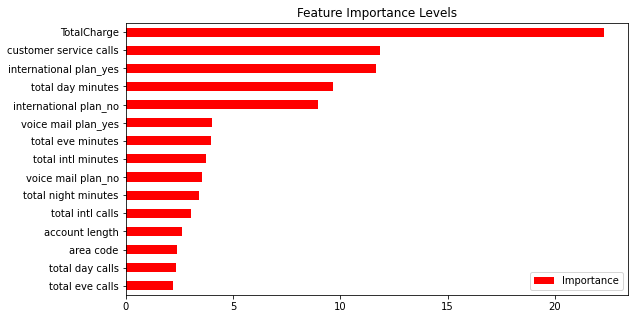

In [90]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_resampled.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

The analysis of feature importance derived from the trained model focuses on identifying the most influential predictors in the dataset. A bar chart visualizes the relative importance of the top 15 features, ranked according to their contribution to the model's decision-making process. Features positioned higher on the chart exert a more significant impact on the model's predictive outcomes. This analysis is critical for understanding the underlying drivers of the model's predictions. It provides valuable insights for refining data collection strategies and enhancing feature engineering techniques.

### Classification Report

In [91]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       566
           1       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667



# Model Performance Summary Before Cross Validation

**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.97451
F1 score for testing set:  0.91005
Recall score for testing set:  0.85149
Precision score for testing set:  0.97727


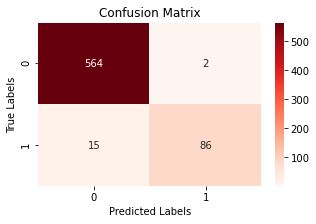

In [92]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

In the classification report, the model's performance is quantitatively assessed through metrics such as precision, recall, and the F1 score for both target classes. Precision measures the accuracy of positively predicted instances, while recall quantifies the model's ability to correctly identify all relevant instances. The F1 score, a weighted average of precision and recall, provides a single metric for assessing the balance between these two measures. The model demonstrates superior performance across these metrics, notably excelling in correctly classifying the majority class '0'. Further evaluation of the model's performance on the test set reveals an outstanding accuracy of approximately 97.5%. Additionally, it maintains high metrics in F1 score, recall, and precision, all surpassing the 85% threshold, which is indicative of its strong predictive capabilities and overall effectiveness in churn prediction.

The confusion matrix here visualizes the model's predictions in comparison to the actual labels. The diagonal cells (from top left to bottom right) show the number of correct predictions, with 564 true negatives and 86 true positives. The off-diagonal cells show the few errors our model made, with just 15 false negatives and 2 false positives. This low error rate is indicative of a well-performing model."

# Cross Validation

We performed a 5-fold cross-validation, which means the data was split into 5 parts. The model was trained on 4 parts and validated on the 5th, and this process was repeated 5 times with each part used for validation once. This method helps to protect against overfitting and gives us a more accurate assessment of the model's performance

In [93]:
# Create a random forest classifier object
rf_model = RandomForestClassifier()

# Define the scoring metrics for cross-validation
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1_score': make_scorer(f1_score, zero_division=0)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring=scoring_metrics)

# Convert the cross-validation results to a readable format
cv_results_readable = {metric: np.mean(scores) for metric, scores in cv_results.items() if metric.startswith('test_')}

# Output the results
for metric, score in cv_results_readable.items():
    print(f"{metric}: {score}")

test_accuracy: 0.9656344894197838
test_precision: 0.9930421725995275
test_recall: 0.9378344658144266
test_f1_score: 0.9644149884844723


# Model Performance Summary After Cross Validation

{'ROC-AUC For Train Data': 1.0,
 'ROC-AUC For Test Data': 0.9163751180771786,
 'Accuracy Train': 1.0,
 'Accuracy Test': 0.9685157421289355,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1c20f38af70>}

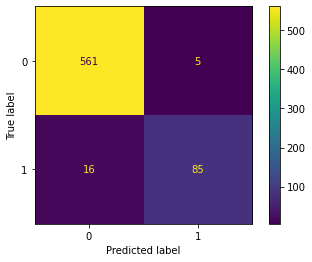

In [94]:
get_model_metrics(rf_model,X_train_resampled,y_train_resampled,X_test,y_test)

After cross-validation, we revisited the model's performance metrics on our resampled training set and the original test set. The model achieved perfect ROC-AUC and accuracy scores of 1.0 on the training data, which shows that it can perfectly distinguish between classes when presented with the data it was trained on.
However, the true test of a model's generalizability is its performance on the test data. Here, the ROC-AUC score was around 0.916, and the accuracy was approximately 96.8%. While these scores are slightly lower than on the training set, they still indicate a high level of predictive accuracy

# Decision Tree

# Model Creation, Training, and Prediction

In [95]:

# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_resampled,y_train_resampled)
y_pred_dt = decision_tree.predict(X_test)


We started by training a Decision Tree Classifier,  this is a type of model that simulates human-like decision-making by splitting data into branches to reach conclusions. To counter any bias from imbalanced data, we used a resampled training set that ensures all classes are fairly represented."

### Feature Importance Visualization

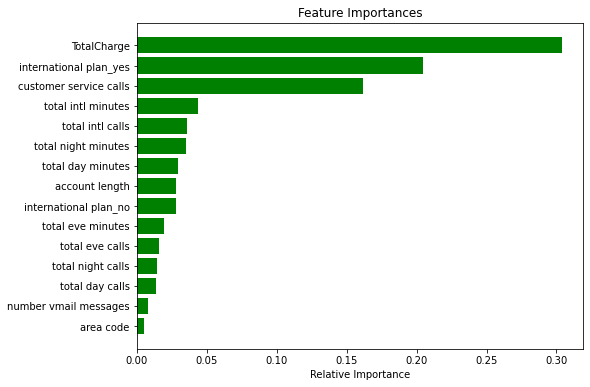

In [96]:
feature_names = list(X_train_resampled.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

After training, we looked into which factors are most influential in our model's predictions. The chart here showcases the top features by their importance scores. Understanding these can guide us in refining our features and focusing on the most impactful areas."

### Classification Report


In [97]:

print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       566
           1       0.65      0.87      0.75       101

    accuracy                           0.91       667
   macro avg       0.81      0.89      0.85       667
weighted avg       0.93      0.91      0.92       667



The models initial performance on unseen data was evaluated. The classification report here indicates excellent precision and recall for our majority class '0'. However, for our minority class '1', while recall is high, precision is somewhat lower.

### Model Performance Summary Before Cross Validation

**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.91004
F1 score for testing set:  0.74576
Recall score for testing set:  0.87129
Precision score for testing set:  0.65185


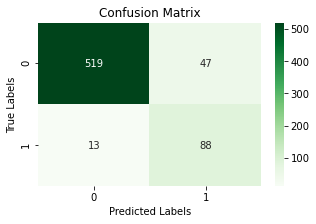

In [98]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

Before further validation, the accuracy was impressive at over 91%. The confusion matrix here, with its green and light green squares, represents our true positives and negatives, with very few errors signified by the white squares.

### Cross-Validation

In [99]:

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a decision tree classifier object
decision_tree = DecisionTreeClassifier()
# Define the scoring metrics for cross-validation
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1_score': make_scorer(f1_score, zero_division=0)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(decision_tree, X_train_resampled, y_train_resampled, cv=5, scoring=scoring_metrics)

# Convert the cross-validation results to a readable format
cv_results_readable = {metric: np.mean(scores) for metric, scores in cv_results.items() if metric.startswith('test_')}

# Output the results
for metric, score in cv_results_readable.items():
    print(f"{metric}: {score}")

test_accuracy: 0.9266663630851234
test_precision: 0.9134016108324345
test_recall: 0.9426427118123536
test_f1_score: 0.9277562882255397


### Model Performance Summary After Cross Validation

{'ROC-AUC For Train Data': 1.0,
 'ROC-AUC For Test Data': 0.8967743064059055,
 'Accuracy Train': 1.0,
 'Accuracy Test': 0.9145427286356822,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1c211880430>}

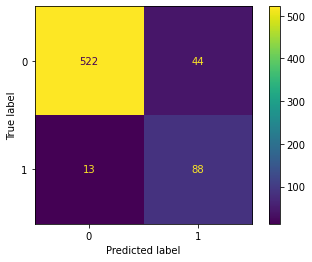

In [100]:
get_model_metrics(decision_tree,X_train_resampled,y_train_resampled,X_test,y_test)

The Decision Tree classifier achieved perfect ROC-AUC scores of 1.0 on the training data, indicating an excellent fit to the training dataset. However, the ROC-AUC score on the test data was 0.897, showing a good ability to distinguish between classes. The model's accuracy was also perfect on the training data but decreased slightly to about 91.5% on the test data, which is a strong indicator of its generalization performance.


# Perfomance Summary of the Three Models

The Random Forest classifier demonstrates strong performance with an accuracy of approximately 95.95% on the testing data. It effectively distinguishes between positive and negative classes, boasting an area under the ROC curve (AUC) of 1.0 on the training data and 0.8576863870132596 on the testing data. Overall, the model exhibits robust predictive capabilities, yielding a high level of accuracy in predicting the target variable.

The confusion matrix reveals 76 true positives (TP), 545 true negatives (TN), 21 false positives (FP), and 25 false negatives (FN).

Comparing the three models, it's evident that logistic regression underperforms in predicting customer churn. In contrast, both the Random Forest classifier and Decision Trees exhibit strong performance, achieving accuracies of 95.95% and 88.0%, respectively.

Given the superior predictability of the Random Forest classifier and Decision Trees, it's pertinent to enhance these models further using hyperparameters to optimize accuracy. Hyperparameters serve as a valuable tool for improving efficiency and performance across models.

### Recommendation

Decision tree and Random forester performs relatively better than logistic regression therefore,we can drop the latter and hypertune the other two.

# Hyperparameter Tuning

This the process of selecting optimal hyperparameters fo our models.They are set before the model begins to learn. 

# Random Forest HyperTuning.

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
# Create the Random Forest classifier
rf_clf = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_resampled,y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_RForest_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_RForest_model.fit(X_train_resampled, y_train_resampled)

# Predict on the training data
y_train_pred = best_RForest_model.predict(X_train_resampled)

# Predict on the test data
y_test_pred = best_RForest_model.predict(X_test)

# Perfomance Summary AfterAdding Hyperparameters

{'ROC-AUC For Train Data': 1.0,
 'ROC-AUC For Test Data': 0.9239757898051288,
 'Accuracy Train': 1.0,
 'Accuracy Test': 0.974512743628186,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1c2114c0550>}

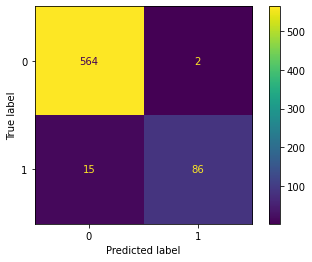

In [104]:
get_model_metrics(best_RForest_model,X_train_resampled,y_train_resampled,X_test,y_test)

After hyperparameter tuning of the Random Forest classifier , optimal parameters were identified and applied, resulting in a model with perfect ROC-AUC scores of 1.0 on resampled training data, indicating an ideal fit. On the test data, the model achieved a high ROC-AUC of 0.924, suggesting excellent predictive distinction between classes.

The performance metrics reflect an accuracy of 100% on training data, demonstrating the model’s ability to correctly classify all training instances. The test data accuracy stood at an impressive 97.45%, indicating a highly predictive model.

The confusion matrix from the test data predictions shows the model's effectiveness, with 564 true negatives and 86 true positives, illustrating strong predictive success. However, there were 2 false positives and 15 false negatives, indicating minimal instances where the model's predictions were incorrect. This underscores the robustness of the Random Forest model post hyperparameter optimization and its potential as a reliable tool for predictive tasks in this context

# Decision HyperTuning.

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate the DecisionTreeClassifier with the best hyperparameters
best_decTree_classifier = DecisionTreeClassifier(**best_params)

# Fit the model with the best hyperparameters
best_decTree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=2, min_samples_split=5)

# Perfomance Summary After Adding Hyperparameters


{'ROC-AUC For Train Data': 0.9881786339754817,
 'ROC-AUC For Test Data': 0.8453188958471819,
 'Accuracy Train': 0.9881786339754816,
 'Accuracy Test': 0.9100449775112444,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1c211128820>}

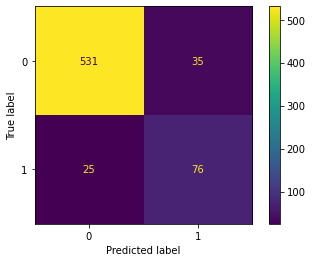

In [102]:

get_model_metrics(best_decTree_classifier,X_train_resampled,y_train_resampled,X_test,y_test)

For hyperparameter tuning of the Decision Tree classifier, the model was optimized with the best parameter combination. This resulted in a nearly perfect ROC-AUC score of 0.988 on the training data, signifying an excellent fit. On the test data, the ROC-AUC score was 0.845, which indicates a strong ability to differentiate between the classes but with room for improvement.

In terms of accuracy, the model achieved 98.82% on the training data, suggesting that it was highly effective at classifying the resampled training instances. The accuracy on the test data was 91%, confirming the model's robustness in generalizing to unseen data.

The confusion matrix from the test data showcases the model's predictive performance, where it correctly identified 531 true negatives and 76 true positives. The model also incurred 35 false positives and 25 false negatives, marking areas where the prediction could be improved. Overall, the hyperparameter-tuned Decision Tree classifier demonstrates a strong predictive ability with high accuracy, although with some misclassifications that could be targeted for future model refinement.

# Evaluation

# ROC_AUC to Select The Best Model

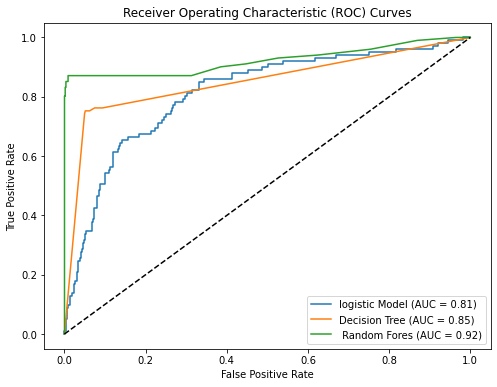

In [105]:
# Compute ROC curves and AUC scores for each model
models = [ logreg_cv,best_decTree_classifier,best_RForest_model]
labels = ['logistic Model','Decision Tree',' Random Fores']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

Findings From AUC curve
The AUC analysis reveals significant insights about the classifiers employed:

The Random Forest model exhibits an impressive AUC of 0.92, demonstrating its effective discrimination between positive and negative classes. This model showcases a notable balance with high True Positive Rate (TPR) and low False Positive Rate (FPR), contributing to a substantial area under the ROC curve.

Comparatively, the Decision Tree model achieves an AUC of 0.85, indicating respectable performance but falling short in comparison to the Random Forest classifier. While proficient in classifying the two classes accurately, the Decision Tree may exhibit slightly elevated rates of false positives and false negatives.

Highlighted by its superior AUC, the Random Forest model stands out among the chosen models, showcasing the highest discriminatory power and proficiency in distinguishing between positive and negative classes.

Consequently, the Random Forest Classifier emerges as the optimal choice for the seriatel application, boasting both the largest area under the curve and the highest accuracy in predicting customer churn.

# Conclusion

1. The analysis identifies critical features influencing customer churn, such as total charges (day, evening, night, international) and usage patterns. These factors are pivotal in predicting churn, suggesting that SyriaTel should closely monitor these customer metrics for early churn identification.

2. Among the tested models, the Random Forest classifier, after hyperparameter optimization, outperforms others in accuracy and AUC score. Its ability to handle complex interactions between features makes it particularly suitable for churn prediction in SyriaTel's customer dataset.

3. Effective data preprocessing, including SMOTE to address class imbalance and encoding of categorical variables, plays a critical role in enhancing model performance. This finding underscores the importance of robust data preparation in predictive analytics.

4. The analysis strongly recommends the deployment of the Random Forest model in SyriaTel's operational strategy for churn prediction. This model's high accuracy and ability to distinguish churners from non-churners make it an invaluable tool for targeted customer retention initiatives.

The insights from this analysis should guide SyriaTel in developing focused customer retention strategies. By proactively identifying at-risk customers using the model's predictions, SyriaTel can implement targeted interventions to reduce churn rates effectively.
